In [1]:
import pandas as pd
import numpy as np
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs

from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace("notebooks/tt", "")
D1 = TOP + 'data/'
figures_dir = TOP + 'manuscript/figures/'

In [3]:
df = pd.read_excel(D1+'dnt_clin.xlsx')

In [15]:
def mk_fp(df):

    '''
    Function to create a Morgan FP  of length 1024 and radius 3. Input file is expecting a dtxsid and smiles column in a df. 
    Expects dtxsid as identifier and smiles as SMILES.
    Returns df of index as dtxsid values and columns as 1024 morgan FP
    '''

    MOLS = dict(zip(df['DTXSID'], df['SMILES']))
    MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
    MOLS = {i:j for i,j in MOLS.items() if j}
    FP0 = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,2048)) for i in MOLS.values()])
    FP0.index = MOLS.keys()
    FP0.columns = ['mrgn_%d'%i for i in FP0.columns]
    return FP0

In [16]:
chm = mk_fp(df[df['SMILES'].notnull()])

In [18]:
def distance_matrix(df):
    '''
    Function to create a pairwise square distance matrix using the Jaccard index
    '''
    D_mgrn = pd.DataFrame(squareform(pdist(df, 'jaccard')), columns = df.index, index = df.index)

    return D_mgrn

In [19]:
Dchm = distance_matrix(chm)

In [22]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

In [23]:
Zm = linkage(squareform(Dchm), 'ward')

In [37]:
ids_to_chk = df[df['dnt_clinical_signs'] ==1]['DTXSID'].tolist()

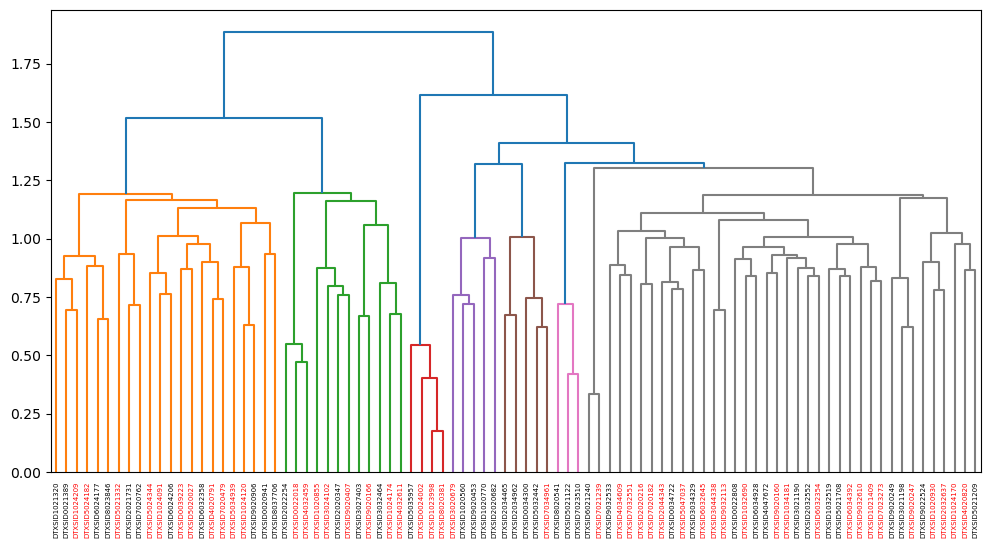

In [45]:
f, ax = plt.subplots(figsize = (12,6))
dendrogram(
    Zm,
    labels = Dchm.index,
    
    )


xlbls = ax.get_xticklabels()
for lbl in xlbls:
    if lbl.get_text() in ids_to_chk:
        lbl.set_color('red')

plt.show()
f.savefig(figures_dir+'dnt_clin_dendrogram.png', dpi = 300)